` pip install tbats`

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.datasets import load_airline
from aeon.forecasting.naive import NaiveForecaster
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.base import ForecastingHorizon
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error
from aeon.forecasting.bats import BATS

In [8]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train

fh = np.arange(1, len(y_test) + 1)

0.08185558916382435

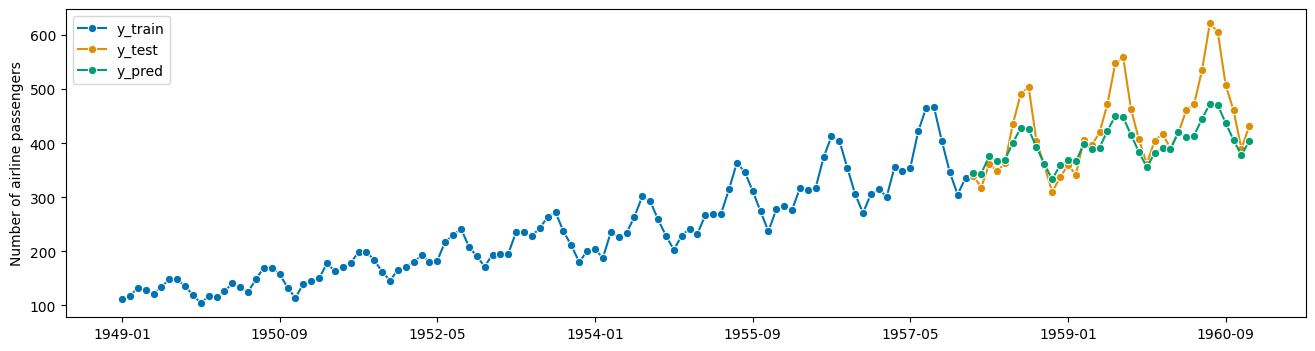

In [9]:
forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

0.08024090844021908

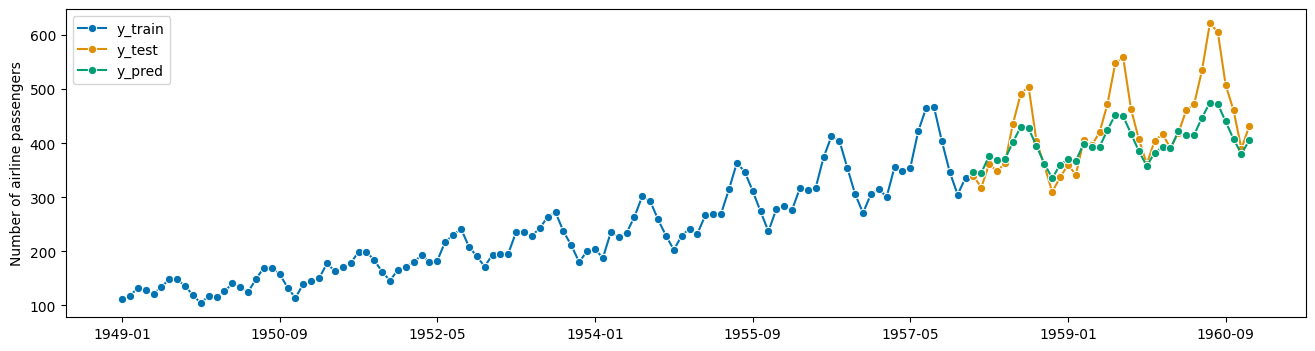

In [10]:
from aeon.forecasting.tbats import TBATS

forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)